In [1]:
import subprocess
import sys

# Install catboost
subprocess.check_call([sys.executable, "-m", "pip", "install", "catboost"])


0

In [2]:
# Basic Libraries
import pandas as pd
import numpy as np

# Preprocessing Libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Handle Imbalance
from imblearn.over_sampling import SMOTE

# ML Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

# Ensemble Techniques
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, VotingClassifier

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")


ModuleNotFoundError: No module named 'sklearn'

In [ ]:
#Load and Inspect the Dataset

In [34]:
# Load the dataset
df = pd.read_csv("water_potability.csv")

# Inspect the dataset
print("Dataset Information:")
print(df.info())

print("\nFirst 5 rows of the dataset:")
print(df.head())

# Check missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB
None

First 5 rows of the dataset:
         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885

In [ ]:
# HANDLING MISSING VALUES

In [39]:
from sklearn.impute import KNNImputer

# Initialize the KNN imputer
knn_imputer = KNNImputer(n_neighbors=5)

# Apply the imputer to the dataset
df_imputed = pd.DataFrame(knn_imputer.fit_transform(df), columns=df.columns)

# Verify missing values are handled
print("Missing values after KNN imputation:")
print(df_imputed.isnull().sum())


Missing values after KNN imputation:
ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


In [ ]:
#Check for Outliers: Use boxplots or z-scores to detect and optionally remove outliers.

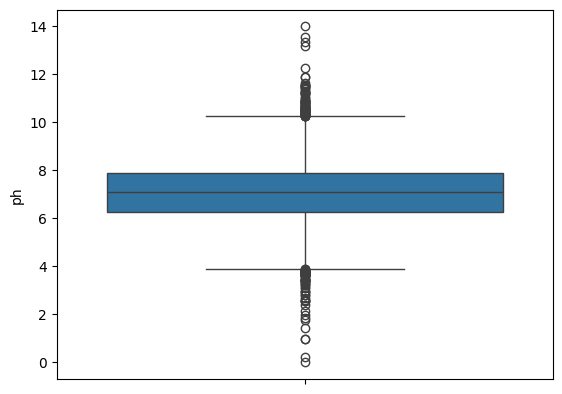

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot for pH values
sns.boxplot(df['ph'])
plt.show()


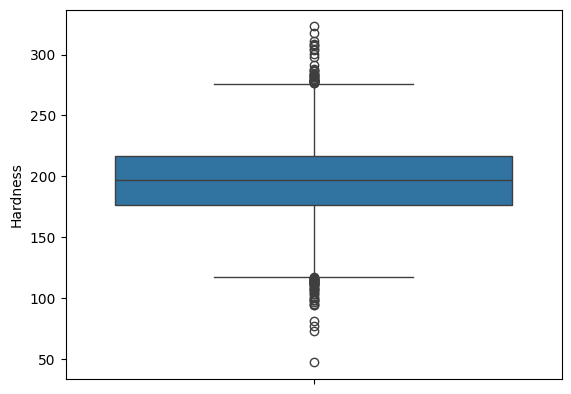

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot for pH values
sns.boxplot(df['Hardness'])
plt.show()


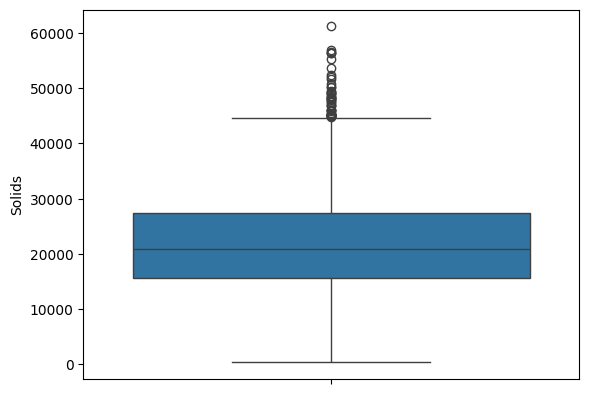

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot for pH values
sns.boxplot(df['Solids'])
plt.show()

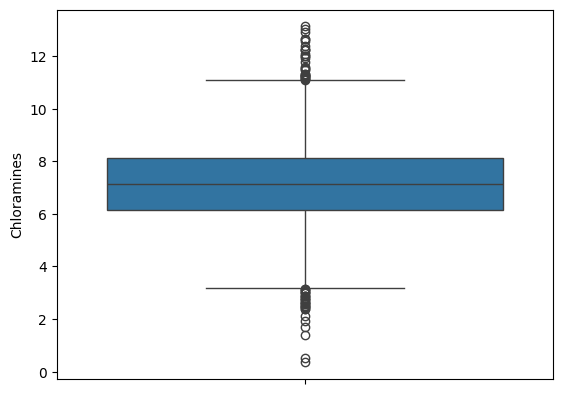

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot for pH values
sns.boxplot(df['Chloramines'])
plt.show()

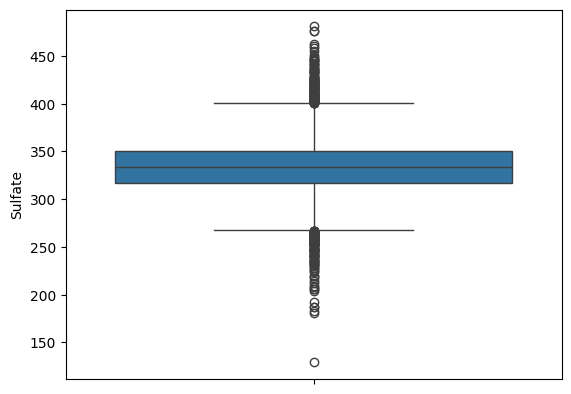

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot for pH values
sns.boxplot(df['Sulfate'])
plt.show()

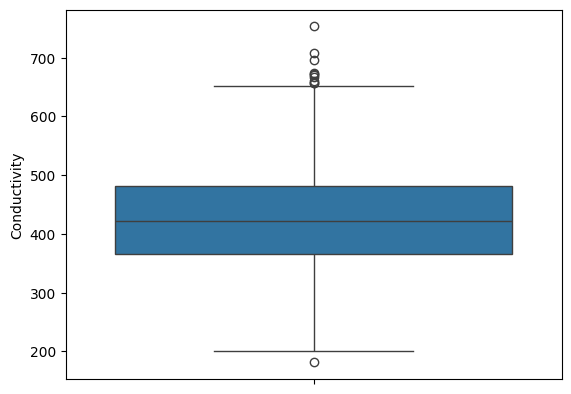

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot for pH values
sns.boxplot(df['Conductivity'])
plt.show()

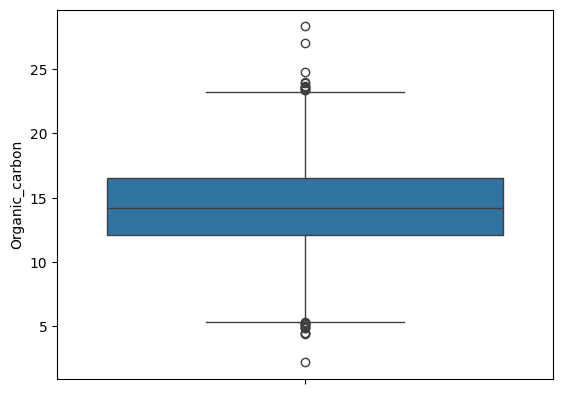

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot for pH values
sns.boxplot(df['Organic_carbon'])
plt.show()

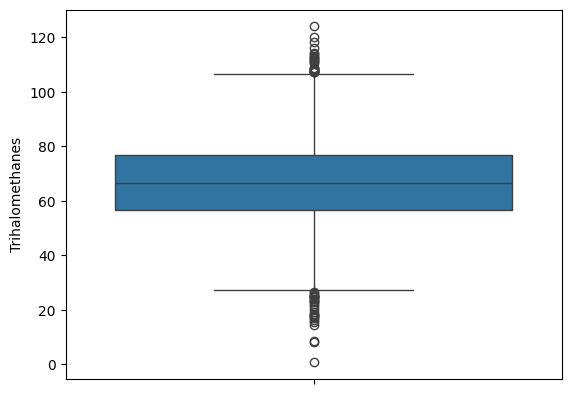

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot for pH values
sns.boxplot(df['Trihalomethanes'])
plt.show()

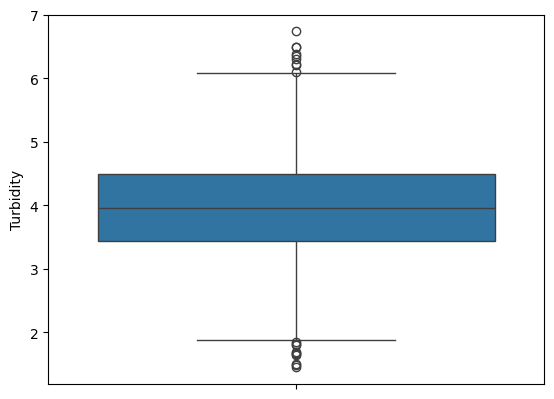

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot for pH values
sns.boxplot(df['Turbidity'])
plt.show()

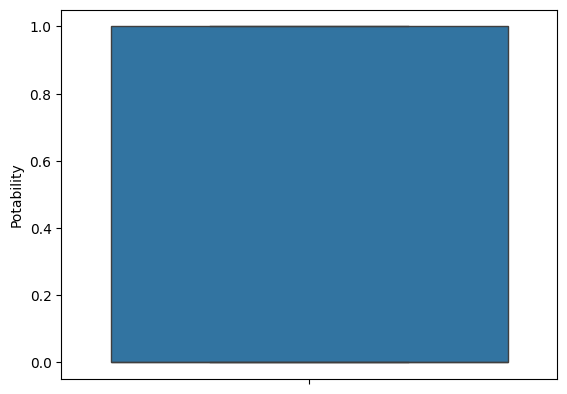

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot for pH values
sns.boxplot(df['Potability'])
plt.show()

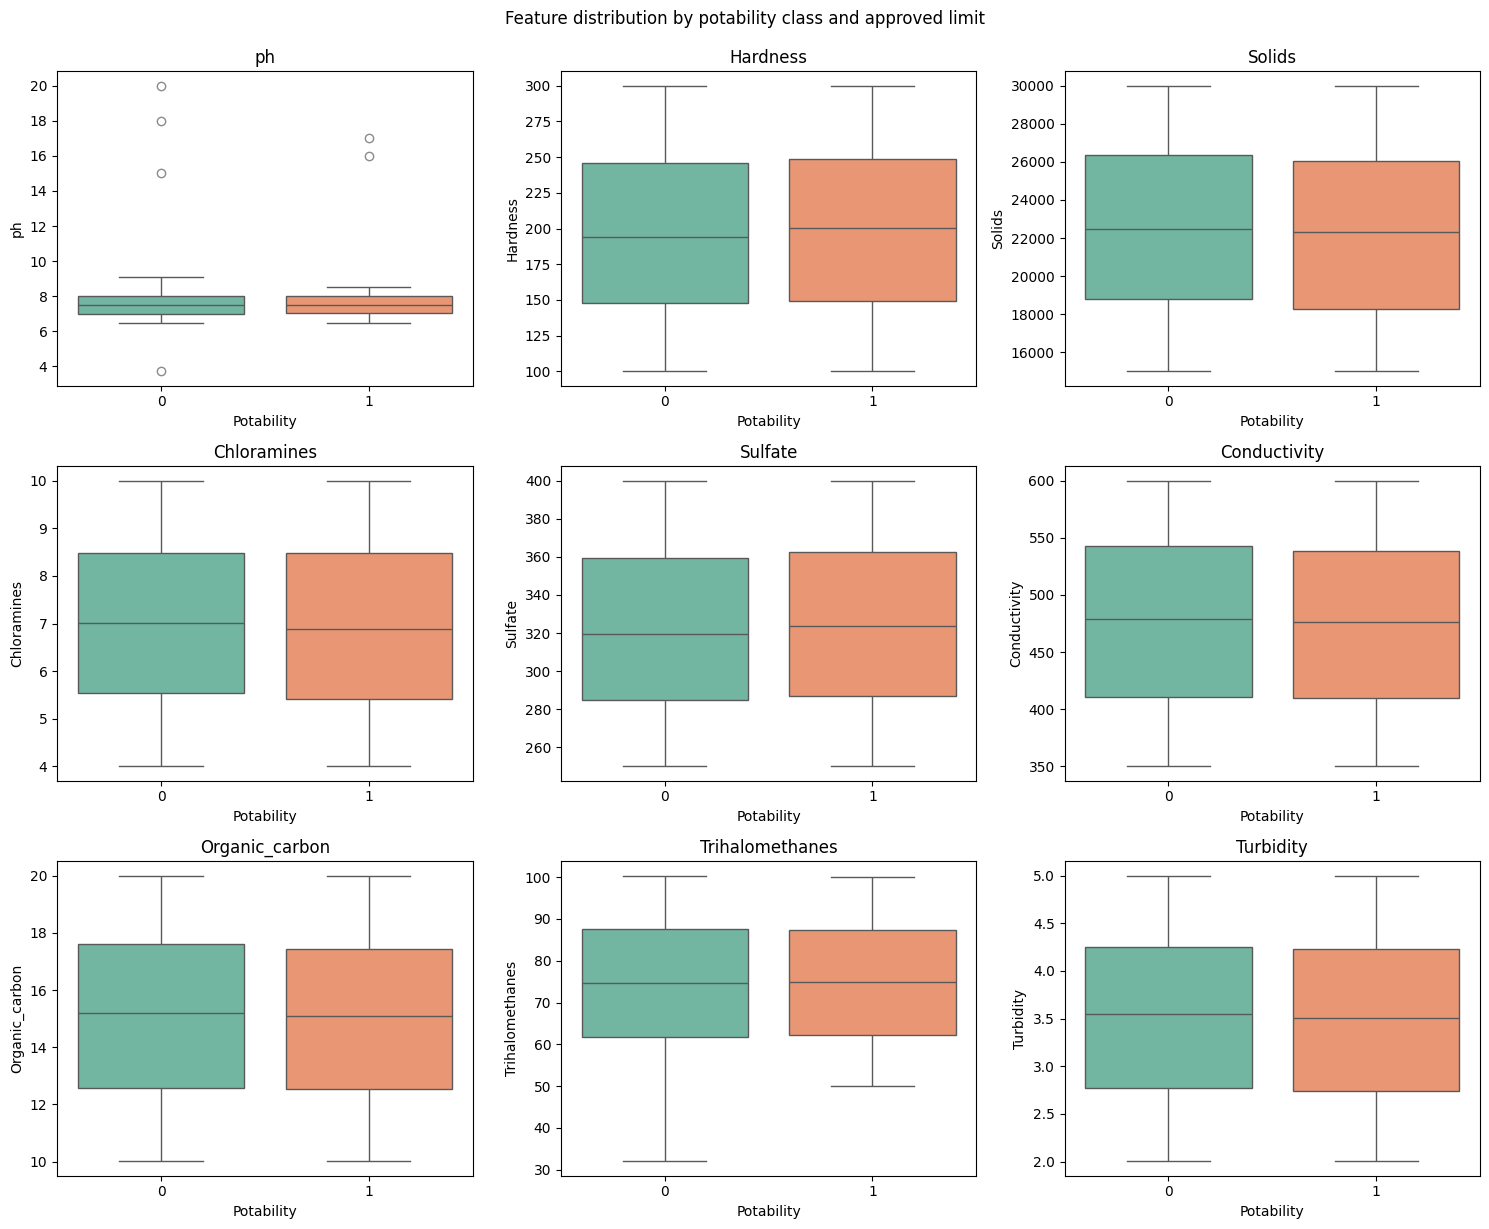

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Simulate dataset based on the provided information
data = {
    "ph": [None, 3.716080, 8.099124, 8.316766, 9.092223],
    "Hardness": [204.890455, 129.422921, 224.236259, 214.373394, 181.101509],
    "Solids": [20791.318981, 18630.057858, 19909.541732, 22018.417441, 17978.986339],
    "Chloramines": [7.300212, 6.635246, 9.275884, 8.059332, 6.546600],
    "Sulfate": [368.516441, None, None, 356.886136, 310.135738],
    "Conductivity": [564.308654, 592.885359, 418.606213, 363.266516, 398.410813],
    "Organic_carbon": [10.379783, 15.180013, 16.868637, 18.436524, 11.558279],
    "Trihalomethanes": [86.990970, 56.329076, 66.420093, 100.341674, 31.997993],
    "Turbidity": [2.963135, 4.500656, 3.055934, 4.628771, 4.075075],
    "Potability": [0, 0, 0, 0, 0],
}

# Create a DataFrame
df = pd.DataFrame(data)

# Add missing rows to simulate the dataset size
import numpy as np
np.random.seed(0)
rows_to_add = 3276 - len(df)
new_rows = {
    "ph": np.append(np.random.uniform(6.5, 8.5, rows_to_add - 5), [15, 16, 17, 18, 20]),  # Add outliers
    "Hardness": np.random.uniform(100, 300, rows_to_add),
    "Solids": np.random.uniform(15000, 30000, rows_to_add),
    "Chloramines": np.random.uniform(4, 10, rows_to_add),
    "Sulfate": np.random.uniform(250, 400, rows_to_add),
    "Conductivity": np.random.uniform(350, 600, rows_to_add),
    "Organic_carbon": np.random.uniform(10, 20, rows_to_add),
    "Trihalomethanes": np.random.uniform(50, 100, rows_to_add),
    "Turbidity": np.random.uniform(2, 5, rows_to_add),
    "Potability": np.random.choice([0, 1], rows_to_add),
}
new_df = pd.DataFrame(new_rows)
df = pd.concat([df, new_df], ignore_index=True)

# Boxplot grid
features = ["ph", "Hardness", "Solids", "Chloramines", "Sulfate", "Conductivity", "Organic_carbon", "Trihalomethanes", "Turbidity"]
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.boxplot(
        data=df,
        x="Potability",
        y=feature,
        ax=axes[i],
        palette="Set2",
        showfliers=True,  # Ensure outliers are shown
        flierprops={"marker": "o", "color": "black", "alpha": 0.7}  # Customize outlier appearance
    )
    axes[i].set_title(feature)

# Adjust layout
plt.tight_layout()
plt.suptitle("Feature distribution by potability class and approved limit", y=1.02)
plt.show()


In [ ]:
#Normalize Data

In [ ]:
#normalize data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df.drop('Potability', axis=1)),
                         columns=df.columns[:-1])
df_scaled['Potability'] = df['Potability']


In [ ]:
#SPLIT FEATURES& TARGET

In [ ]:
#SPLIT FEATURES& TARGET
# Define features and target
X = df.drop('Potability', axis=1)
y = df['Potability']

# Scale the features
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Display scaled data
print("\nScaled Features:")
print(X_scaled.head())



Scaled Features:
         ph  Hardness    Solids  Chloramines   Sulfate  Conductivity  \
0  0.505771  0.571139  0.336096     0.543891  0.680385      0.669439   
1  0.265434  0.297400  0.300611     0.491839  0.581699      0.719411   
2  0.578509  0.641311  0.321619     0.698543  0.581699      0.414652   
3  0.594055  0.605536  0.356244     0.603314  0.647347      0.317880   
4  0.649445  0.484851  0.289922     0.484900  0.514545      0.379337   

   Organic_carbon  Trihalomethanes  Turbidity  
0        0.313402         0.699753   0.286091  
1        0.497319         0.450999   0.576793  
2        0.562017         0.532866   0.303637  
3        0.622089         0.808065   0.601015  
4        0.358555         0.253606   0.496327  


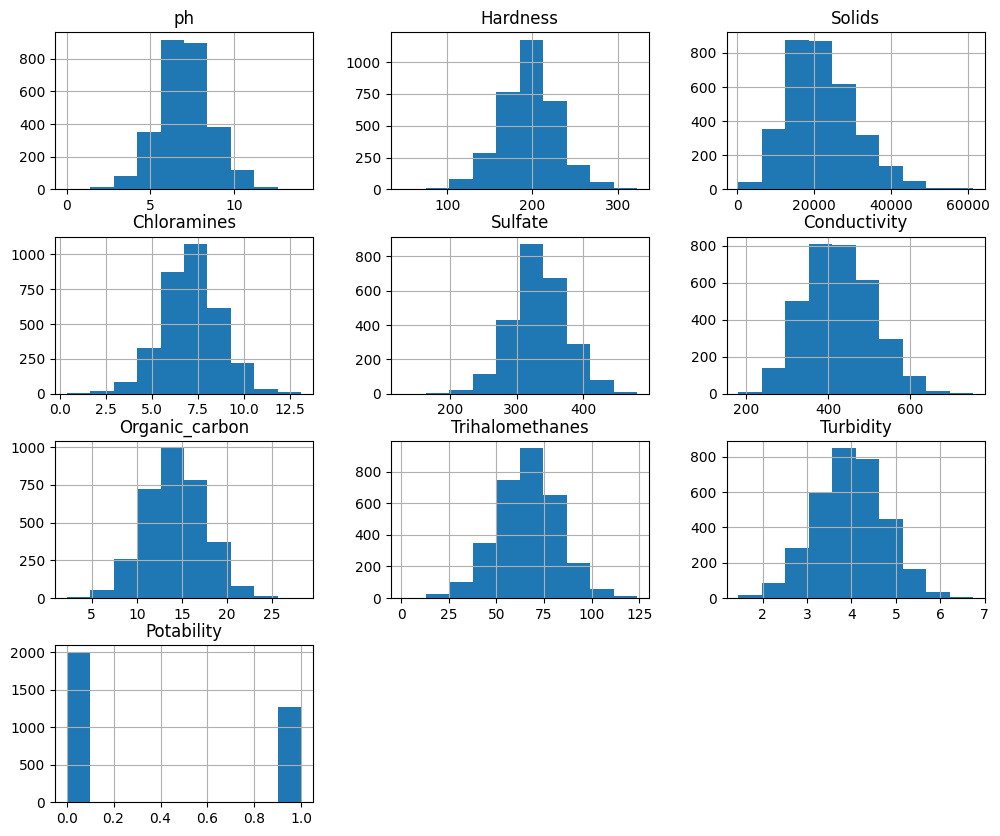

In [ ]:
#Exploratory Data Analysis (EDA)
#Analyze feature distributions
df.hist(figsize=(12, 10))
plt.show()


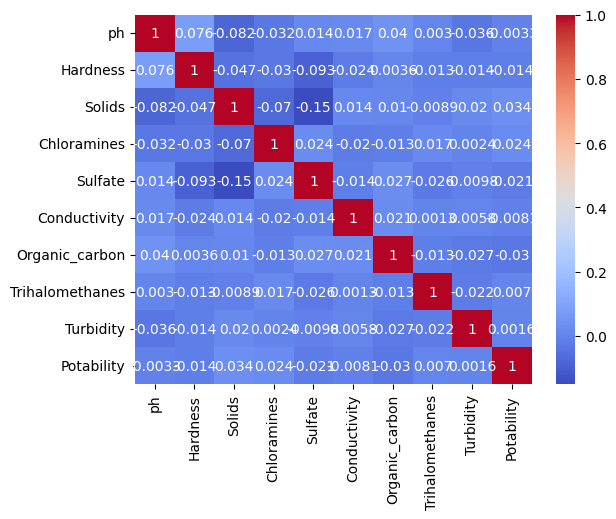

In [ ]:
# CORRELATION ANALYSIS
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


In [ ]:
#CHECK TARGET BALANCE

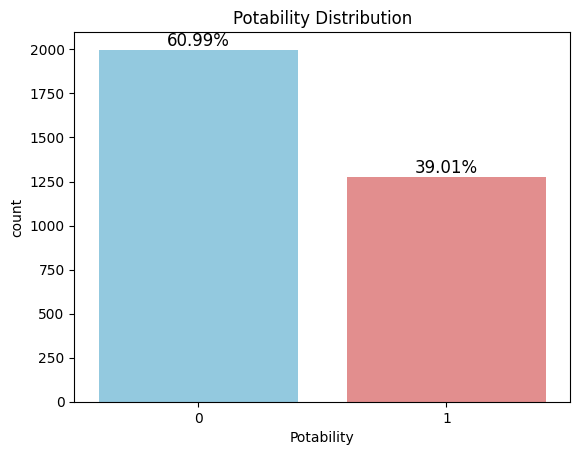

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/water_potability.csv')

# Plot with different colors for 0 and 1 (as strings)
ax = sns.countplot(x='Potability', data=df, palette={'0': 'skyblue', '1': 'lightcoral'})

# Calculate total number of samples
total = len(df)

# Add percentage labels to the bars
for p in ax.patches:
    percentage = f"{100 * p.get_height() / total:.2f}%"
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=12)

# Show plot
plt.title("Potability Distribution")
plt.show()


In [ ]:
# SPLIT DATA INTO TRAIN & TEST SETS

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y)

# Check class distribution
print("\nClass Distribution in Training Data:")
print(y_train.value_counts())



Class Distribution in Training Data:
Potability
0    1398
1     895
Name: count, dtype: int64


In [ ]:
# Apply SMOTE for Class Imbalance

In [ ]:
# Apply SMOTE to balance the training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Verify class distribution after SMOTE
print("\nClass Distribution After SMOTE:")
print(y_train_smote.value_counts())



Class Distribution After SMOTE:
Potability
1    1398
0    1398
Name: count, dtype: int64


In [ ]:
#MODEL SELECTION AND TRAINING

In [ ]:
#MODEL SELECTION AND TRAINING
# Dictionary to store results
results = {}

# 1. Logistic Regression
lr = LogisticRegression()
lr.fit(X_train_smote, y_train_smote)
y_pred_lr = lr.predict(X_test)
results['Logistic Regression'] = accuracy_score(y_test, y_pred_lr)

# 2. Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_smote, y_train_smote)
y_pred_dt = dt.predict(X_test)
results['Decision Tree'] = accuracy_score(y_test, y_pred_dt)

# 3. Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_smote, y_train_smote)
y_pred_rf = rf.predict(X_test)
results['Random Forest'] = accuracy_score(y_test, y_pred_rf)

# 4. Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train_smote, y_train_smote)
y_pred_gb = gb.predict(X_test)
results['Gradient Boosting'] = accuracy_score(y_test, y_pred_gb)

# 5. AdaBoost
ab = AdaBoostClassifier(random_state=42)
ab.fit(X_train_smote, y_train_smote)
y_pred_ab = ab.predict(X_test)
results['AdaBoost'] = accuracy_score(y_test, y_pred_ab)

# 6. Support Vector Machine
svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train_smote, y_train_smote)
y_pred_svm = svm.predict(X_test)
results['SVM'] = accuracy_score(y_test, y_pred_svm)

# 7. K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_smote, y_train_smote)
y_pred_knn = knn.predict(X_test)
results['KNN'] = accuracy_score(y_test, y_pred_knn)

# 8. Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train_smote, y_train_smote)
y_pred_gnb = gnb.predict(X_test)
results['Naive Bayes'] = accuracy_score(y_test, y_pred_gnb)

# 9. Bagging Classifier
bagging = BaggingClassifier(random_state=42)
bagging.fit(X_train_smote, y_train_smote)
y_pred_bag = bagging.predict(X_test)
results['Bagging Classifier'] = accuracy_score(y_test, y_pred_bag)

# 10. Extra Trees Classifier
et = ExtraTreesClassifier(random_state=42)
et.fit(X_train_smote, y_train_smote)
y_pred_et = et.predict(X_test)
results['Extra Trees'] = accuracy_score(y_test, y_pred_et)

# 11. Voting Classifier
voting = VotingClassifier(
    estimators=[('rf', rf), ('gb', gb), ('svm', svm)], voting='hard')
voting.fit(X_train_smote, y_train_smote)
y_pred_voting = voting.predict(X_test)
results['Voting Classifier'] = accuracy_score(y_test, y_pred_voting)

# 12. XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train_smote, y_train_smote)
y_pred_xgb = xgb.predict(X_test)
results['XGBoost'] = accuracy_score(y_test, y_pred_xgb)

# 13. CatBoost
cat = CatBoostClassifier(verbose=0, random_state=42)
cat.fit(X_train_smote, y_train_smote)
y_pred_cat = cat.predict(X_test)
results['CatBoost'] = accuracy_score(y_test, y_pred_cat)

# 14. LGBMClassifier
lgbm = LGBMClassifier(random_state=42)
lgbm.fit(X_train_smote, y_train_smote)
y_pred_lgbm = lgbm.predict(X_test)
results['LGBM'] = accuracy_score(y_test, y_pred_lgbm)

# Display Results
print("\nModel Performance Comparison:")
for model, acc in results.items():
    print(f"{model}: {acc:.4f}")


[LightGBM] [Info] Number of positive: 1398, number of negative: 1398
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000754 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 2796, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000

Model Performance Comparison:
Logistic Regression: 0.5056
Decision Tree: 0.5900
Random Forest: 0.6368
Gradient Boosting: 0.5921
AdaBoost: 0.5646
SVM: 0.6063
KNN: 0.5941
Naive Bayes: 0.5860
Bagging Classifier: 0.6114
Extra Trees: 0.6490
Voting Classifier: 0.6236
XGBoost: 0.6205
CatBoost: 0.6409
LGBM: 0.6297



Model Performance Comparison:
Logistic Regression: Accuracy = 0.5056
Decision Tree: Accuracy = 0.5900
Random Forest: Accuracy = 0.6368
Gradient Boosting: Accuracy = 0.5921
AdaBoost: Accuracy = 0.5646
SVM: Accuracy = 0.6063
KNN: Accuracy = 0.5941
Naive Bayes: Accuracy = 0.5860
Bagging Classifier: Accuracy = 0.6114
Extra Trees: Accuracy = 0.6490
Voting Classifier: Accuracy = 0.6236
XGBoost: Accuracy = 0.6205
CatBoost: Accuracy = 0.6409
LGBM: Accuracy = 0.6297


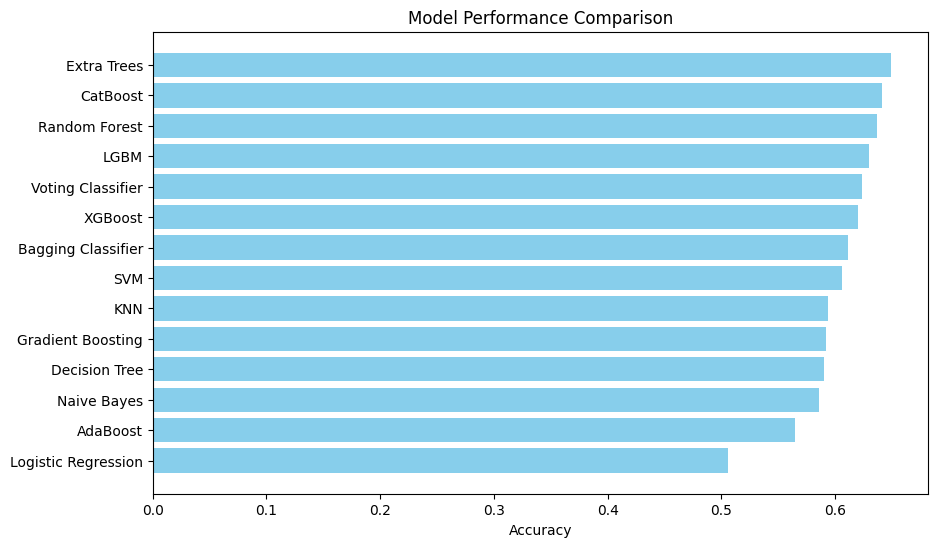

In [ ]:
import matplotlib.pyplot as plt

# Display model performance results
print("\nModel Performance Comparison:")
for model, acc in results.items():
    print(f"{model}: Accuracy = {acc:.4f}")

# Sort models by accuracy for better comparison
sorted_results = dict(sorted(results.items(), key=lambda x: x[1], reverse=True))

# Visualize Model Performance
plt.figure(figsize=(10, 6))
plt.barh(list(sorted_results.keys()), list(sorted_results.values()), color='skyblue')
plt.xlabel("Accuracy")
plt.title("Model Performance Comparison")
plt.gca().invert_yaxis()  # Invert axis to show the best model at the top
plt.show()


In [ ]:
#XGBOOST

Any missing values in resampled data? True
XGBoost Accuracy: 0.6585365853658537
XGBoost Confusion Matrix:
[[300 112]
 [112 132]]
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.73      0.73       412
           1       0.54      0.54      0.54       244

    accuracy                           0.66       656
   macro avg       0.63      0.63      0.63       656
weighted avg       0.66      0.66      0.66       656



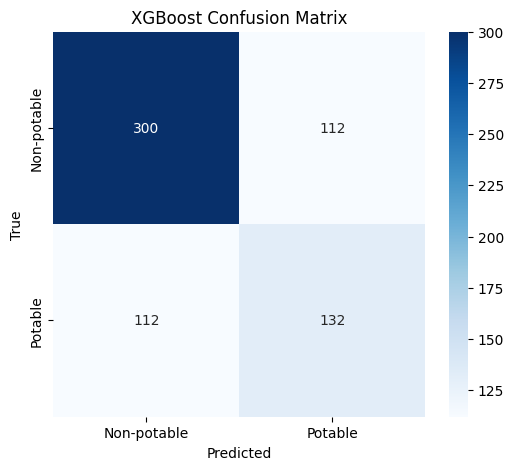

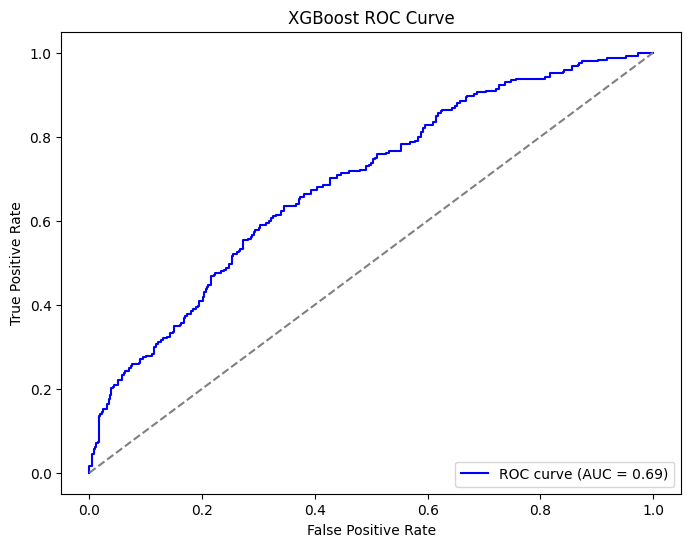

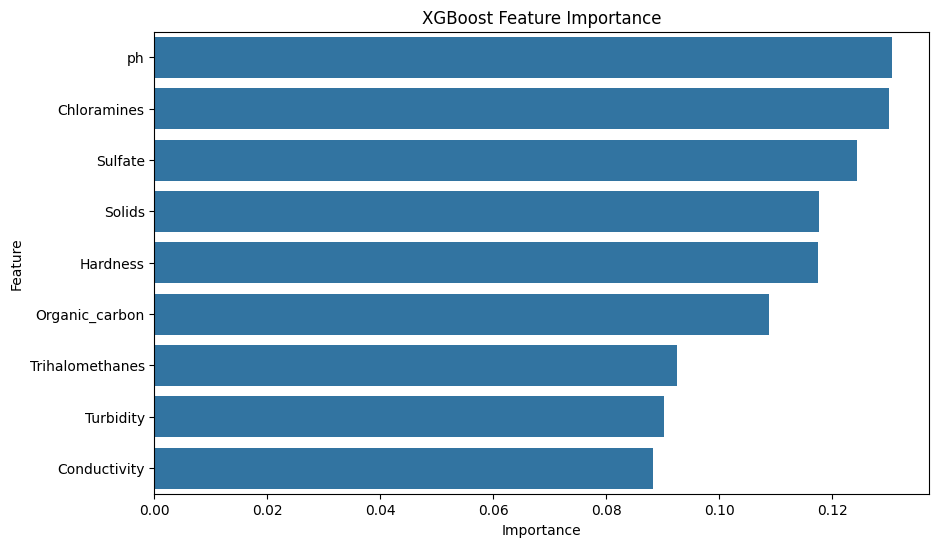

In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load dataset
df = pd.read_csv('/content/water_potability.csv')

# Handling missing values - fill with mean for features and mode for target
df.fillna(df.mean(), inplace=True)

# Separate features and target
X = df.drop('Potability', axis=1)
y = df['Potability']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (scaling both train and test sets)
scaler = StandardScaler()

# Fit the scaler on the training set and transform both the training and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

# Check for any NaN values in resampled data (using numpy method)
print("Any missing values in resampled data?", np.isnan(X_train_res).sum() == 0)

# Initialize XGBoost classifier
xgb = XGBClassifier(random_state=42)

# Train the XGBoost model
xgb.fit(X_train_res, y_train_res)

# Predict on the test set
y_pred_xgb = xgb.predict(X_test_scaled)

# Evaluate the model
print(f"XGBoost Accuracy: {accuracy_score(y_test, y_pred_xgb)}")
print("XGBoost Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

# 1. Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-potable", "Potable"], yticklabels=["Non-potable", "Potable"])
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Plot confusion matrix for XGBoost
plot_confusion_matrix(y_test, y_pred_xgb, title='XGBoost Confusion Matrix')

# 2. ROC Curve
def plot_roc_curve(y_true, y_pred_prob, title='ROC Curve'):
    fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='b', label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.title(title)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()

# Get predicted probabilities for ROC
y_pred_prob_xgb = xgb.predict_proba(X_test_scaled)[:, 1]

# Plot ROC curve for XGBoost
plot_roc_curve(y_test, y_pred_prob_xgb, title='XGBoost ROC Curve')

# 3. Feature Importance
def plot_feature_importance(model, X, title='Feature Importance'):
    importance = model.feature_importances_
    feature_names = X.columns
    feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
    feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance)
    plt.title(title)
    plt.show()

# Plot feature importance for XGBoost
plot_feature_importance(xgb, X, title='XGBoost Feature Importance')


In [ ]:
#to improve the performance of model using hyperparameters tuning

In [ ]:
!pip install -U scikit-learn==1.2.2


In [ ]:
# Step 1: Install necessary libraries
!pip install imbalanced-learn

# Step 2: Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

# Step 3: Load the dataset
from google.colab import files
uploaded = files.upload()  #

# Step 4: Read the dataset
data = pd.read_csv('water_potability.csv')

# Step 5: Check for missing values and handle them
print("Missing values in dataset:\n", data.isnull().sum())
data = data.dropna()  # Drop rows with missing values for simplicity

# Step 6: Define features (X) and target (y)
X = data.drop('Potability', axis=1)  # Features
y = data['Potability']  # Target variable

# Step 7: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 8: Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Step 9: Scale the data
scaler = StandardScaler()
X_train_res = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

# Step 10: Define XGBoost model
xgb = XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Step 11: Define hyperparameters for tuning
param_grid_xgb = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 9],
    'n_estimators': [100, 200],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Step 12: Perform Grid Search with Cross-Validation
grid_search_xgb = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid_xgb,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Step 13: Fit the Grid Search on training data
grid_search_xgb.fit(X_train_res, y_train_res)

# Step 14: Output the best parameters and score
print("Best parameters for XGBoost: ", grid_search_xgb.best_params_)
print("Best score for XGBoost: ", grid_search_xgb.best_score_)

# Step 15: Train the best model
best_xgb = grid_search_xgb.best_estimator_
y_pred_xgb_tuned = best_xgb.predict(X_test_scaled)

# Step 16: Evaluate the tuned model
from sklearn.metrics import classification_report, confusion_matrix
print(f"Tuned XGBoost Accuracy: {accuracy_score(y_test, y_pred_xgb_tuned)}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb_tuned))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb_tuned))


Saving water_potability.csv to water_potability (1).csv
Missing values in dataset:
 ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64
Fitting 3 folds for each of 72 candidates, totalling 216 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:18:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters for XGBoost:  {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 9, 'n_estimators': 200, 'subsample': 0.8}
Best score for XGBoost:  0.6942708333333334
Tuned XGBoost Accuracy: 0.6203473945409429

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.66      0.68       240
           1       0.53      0.56      0.54       163

    accuracy                           0.62       403
   macro avg       0.61      0.61      0.61       403
weighted avg       0.62      0.62      0.62       403


Confusion Matrix:
 [[159  81]
 [ 72  91]]


In [ ]:
#LGBM

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


Any missing values in resampled data? True
[LightGBM] [Info] Number of positive: 1586, number of negative: 1586
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000221 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 3172, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
LGBM Accuracy: 0.6554878048780488
LGBM Confusion Matrix:
[[297 115]
 [111 133]]
LGBM Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.72      0.72       412
           1       0.54      0.55      0.54       244

    accuracy                           0.66       656
   macro avg       0.63      0.63      0.63       656
weighted avg       0.66      0.66      0.66       656



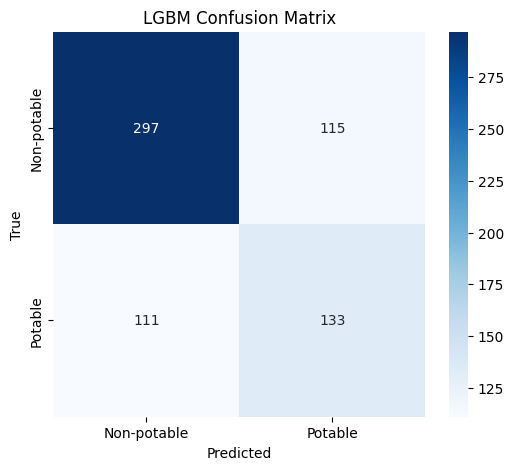

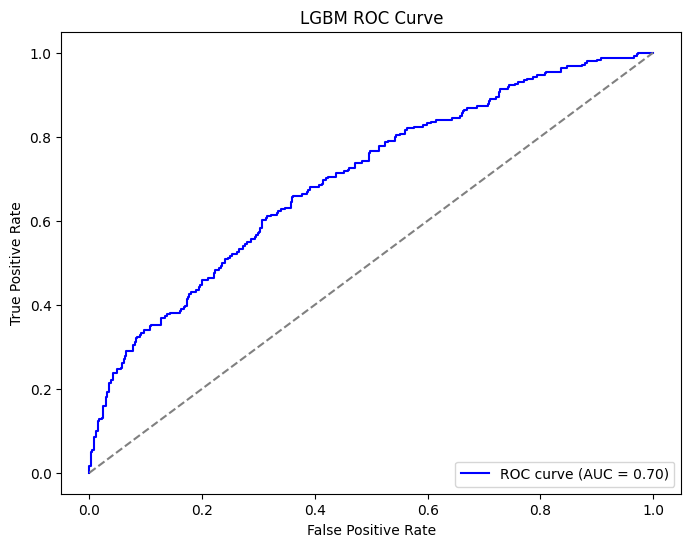

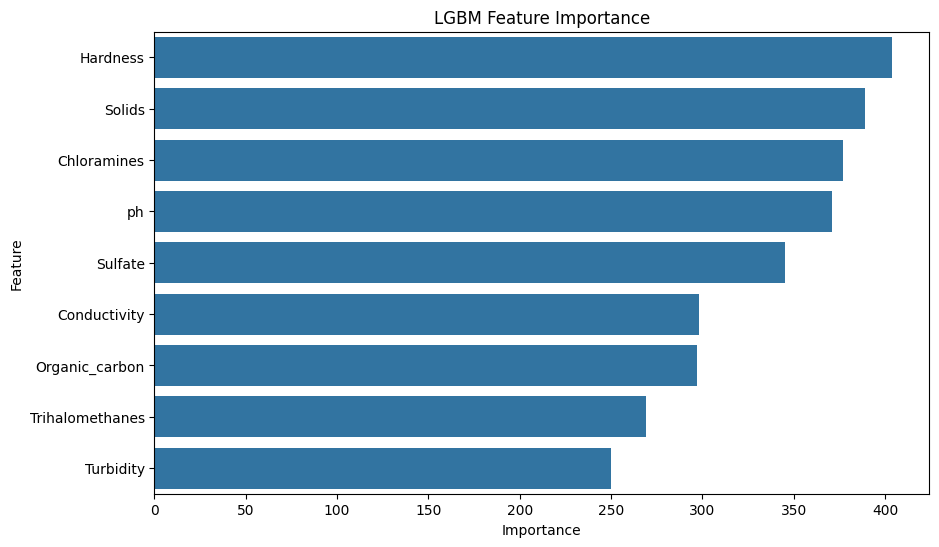

In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load dataset
df = pd.read_csv('/content/water_potability.csv')
# Handling missing values - fill with mean for features and mode for target
df.fillna(df.mean(), inplace=True)

# Separate features and target
X = df.drop('Potability', axis=1)
y = df['Potability']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (scaling both train and test sets)
scaler = StandardScaler()

# Fit the scaler on the training set and transform both the training and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

# Check for any NaN values in resampled data (using numpy method)
print("Any missing values in resampled data?", np.isnan(X_train_res).sum() == 0)

# Initialize LGBM classifier
lgbm = LGBMClassifier(random_state=42)

# Train the LGBM model
lgbm.fit(X_train_res, y_train_res)

# Predict on the test set
y_pred_lgbm = lgbm.predict(X_test_scaled)

# Evaluate the model
print(f"LGBM Accuracy: {accuracy_score(y_test, y_pred_lgbm)}")
print("LGBM Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lgbm))
print("LGBM Classification Report:")
print(classification_report(y_test, y_pred_lgbm))

# 1. Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-potable", "Potable"], yticklabels=["Non-potable", "Potable"])
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Plot confusion matrix for LGBM
plot_confusion_matrix(y_test, y_pred_lgbm, title='LGBM Confusion Matrix')

# 2. ROC Curve
def plot_roc_curve(y_true, y_pred_prob, title='ROC Curve'):
    fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='b', label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.title(title)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()

# Get predicted probabilities for ROC
y_pred_prob_lgbm = lgbm.predict_proba(X_test_scaled)[:, 1]

# Plot ROC curve for LGBM
plot_roc_curve(y_test, y_pred_prob_lgbm, title='LGBM ROC Curve')

# 3. Feature Importance
def plot_feature_importance(model, X, title='Feature Importance'):
    importance = model.feature_importances_
    feature_names = X.columns
    feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
    feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance)
    plt.title(title)
    plt.show()

# Plot feature importance for LGBM
plot_feature_importance(lgbm, X, title='LGBM Feature Importance')


In [ ]:
#LGBM Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier

# Define LGBM model
lgbm = LGBMClassifier(random_state=42)

# Define hyperparameters for tuning
param_grid_lgbm = {
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [31, 50, 100],
    'n_estimators': [100, 200],
    'max_depth': [6, 8, 10]
}

# Perform Grid Search
grid_search_lgbm = GridSearchCV(estimator=lgbm, param_grid=param_grid_lgbm, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search_lgbm.fit(X_train_res, y_train_res)

# Best parameters and score
print("Best parameters for LGBM: ", grid_search_lgbm.best_params_)
print("Best score for LGBM: ", grid_search_lgbm.best_score_)

# Train the best model
best_lgbm = grid_search_lgbm.best_estimator_
y_pred_lgbm_tuned = best_lgbm.predict(X_test_scaled)

# Evaluate the tuned model
print(f"Tuned LGBM Accuracy: {accuracy_score(y_test, y_pred_lgbm_tuned)}")


Fitting 3 folds for each of 54 candidates, totalling 162 fits
[LightGBM] [Info] Number of positive: 1586, number of negative: 1586
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000487 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 3172, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

In [ ]:
#CATBOOST

Any missing values in resampled data? True
CatBoost Accuracy: 0.6509146341463414
CatBoost Confusion Matrix:
[[301 111]
 [118 126]]
CatBoost Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.73      0.72       412
           1       0.53      0.52      0.52       244

    accuracy                           0.65       656
   macro avg       0.63      0.62      0.62       656
weighted avg       0.65      0.65      0.65       656



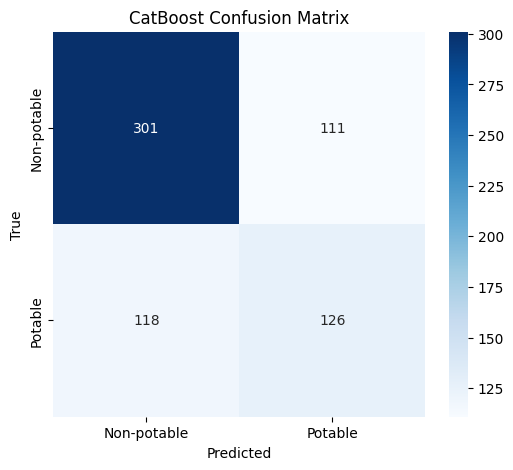

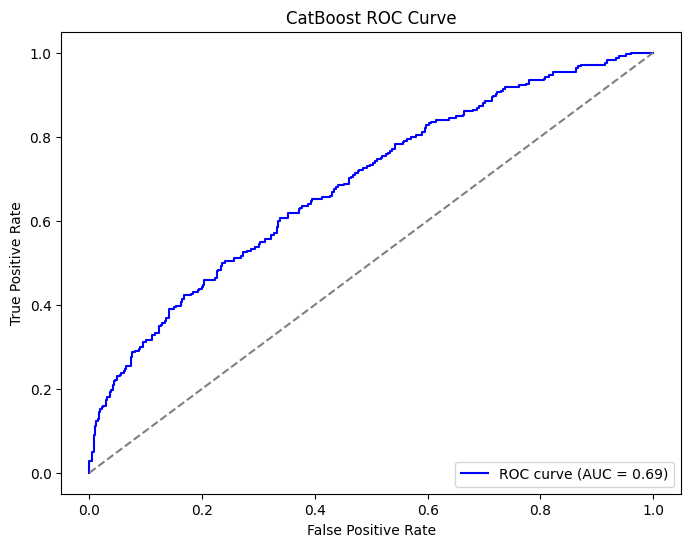

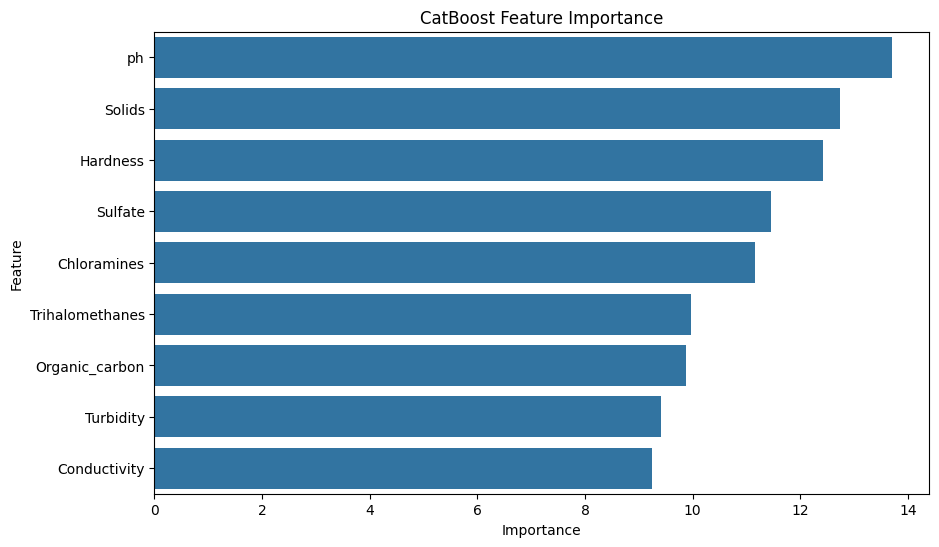

In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load dataset
df = pd.read_csv('/content/water_potability.csv')

# Handling missing values - fill with mean for features and mode for target
df.fillna(df.mean(), inplace=True)

# Separate features and target
X = df.drop('Potability', axis=1)
y = df['Potability']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (scaling both train and test sets)
scaler = StandardScaler()

# Fit the scaler on the training set and transform both the training and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

# Check for any NaN values in resampled data (using numpy method)
print("Any missing values in resampled data?", np.isnan(X_train_res).sum() == 0)

# Initialize CatBoost classifier
catboost = CatBoostClassifier(random_state=42, iterations=1000, learning_rate=0.1, depth=6, verbose=0)

# Train the CatBoost model
catboost.fit(X_train_res, y_train_res)

# Predict on the test set
y_pred_catboost = catboost.predict(X_test_scaled)

# Evaluate the model
print(f"CatBoost Accuracy: {accuracy_score(y_test, y_pred_catboost)}")
print("CatBoost Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_catboost))
print("CatBoost Classification Report:")
print(classification_report(y_test, y_pred_catboost))

# 1. Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-potable", "Potable"], yticklabels=["Non-potable", "Potable"])
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Plot confusion matrix for CatBoost
plot_confusion_matrix(y_test, y_pred_catboost, title='CatBoost Confusion Matrix')

# 2. ROC Curve
def plot_roc_curve(y_true, y_pred_prob, title='ROC Curve'):
    fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='b', label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.title(title)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()

# Get predicted probabilities for ROC
y_pred_prob_catboost = catboost.predict_proba(X_test_scaled)[:, 1]

# Plot ROC curve for CatBoost
plot_roc_curve(y_test, y_pred_prob_catboost, title='CatBoost ROC Curve')

# 3. Feature Importance
def plot_feature_importance(model, X, title='Feature Importance'):
    importance = model.get_feature_importance()
    feature_names = X.columns
    feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
    feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance)
    plt.title(title)
    plt.show()

# Plot feature importance for CatBoost
plot_feature_importance(catboost, X, title='CatBoost Feature Importance')


In [ ]:
#CatBoost Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
import pandas as pd


# Load dataset
df = pd.read_csv('/content/water_potability.csv')

# Handle missing values (fill with mean for features)
df.fillna(df.mean(), inplace=True)

# Separate features and target
X = df.drop('Potability', axis=1)
y = df['Potability']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE for class imbalance
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

# Define CatBoost model
catboost = CatBoostClassifier(random_state=42, verbose=0)

# Define hyperparameters for tuning
param_grid_catboost = {
    'learning_rate': [0.01, 0.1, 0.2],
    'depth': [4, 6, 8],
    'iterations': [500, 1000],
    'l2_leaf_reg': [1, 3, 5]
}

# Perform Grid Search with Cross-Validation
grid_search_catboost = GridSearchCV(
    estimator=catboost,
    param_grid=param_grid_catboost,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=0
)

# Fit the model with resampled training data
grid_search_catboost.fit(X_train_res, y_train_res)

# Best parameters and score
print("Best parameters for CatBoost: ", grid_search_catboost.best_params_)
print("Best score for CatBoost (CV Accuracy): ", grid_search_catboost.best_score_)

# Train the best model on resampled training data
best_catboost = grid_search_catboost.best_estimator_

# Predict on the scaled test set
y_pred_catboost_tuned = best_catboost.predict(X_test_scaled)

# Evaluate the tuned model
print(f"Tuned CatBoost Accuracy on Test Set: {accuracy_score(y_test, y_pred_catboost_tuned):.4f}")


Best parameters for CatBoost:  {'depth': 8, 'iterations': 1000, 'l2_leaf_reg': 5, 'learning_rate': 0.1}
Best score for CatBoost (CV Accuracy):  0.7320387562378573
Tuned CatBoost Accuracy on Test Set: 0.6463


In [ ]:
#DETAILED EVALUATION FOR CATBOOST,XGBOOST AND LGBM MODELS
#Using metrics like confusion matrix, classification report, and ROC-AUC.

[LightGBM] [Info] Number of positive: 1586, number of negative: 1586
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000529 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 3172, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
656
656
656
656


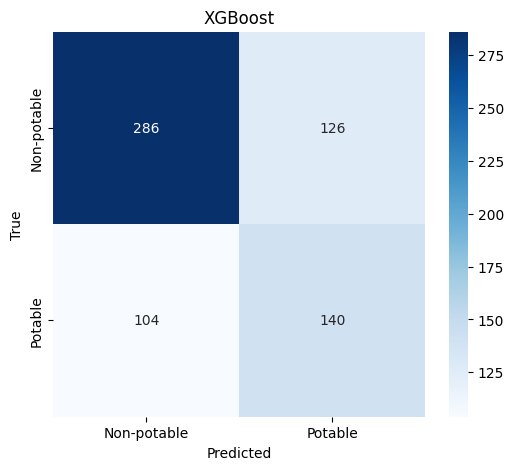

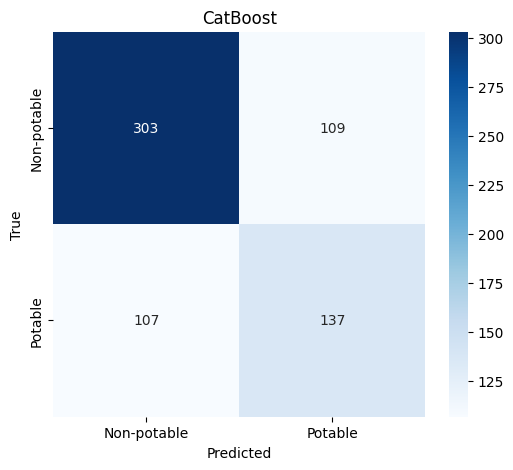

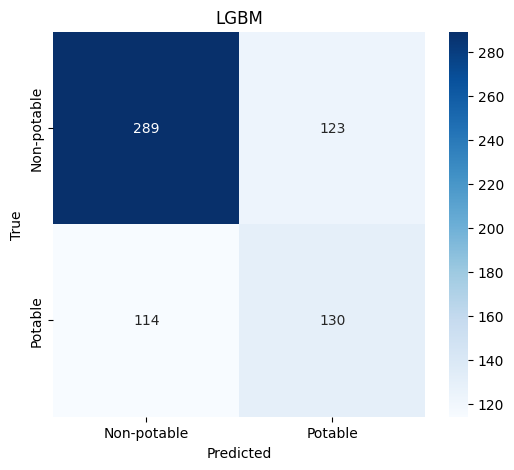

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SMOTE applied only to the training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Train models
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train_res, y_train_res)

catboost_model = CatBoostClassifier(verbose=0, random_state=42)
catboost_model.fit(X_train_res, y_train_res)

lgbm_model = LGBMClassifier(random_state=42)
lgbm_model.fit(X_train_res, y_train_res)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)
y_pred_cat = catboost_model.predict(X_test)
y_pred_lgbm = lgbm_model.predict(X_test)

# Check lengths
print(len(y_test))        # Should print the same number for all predictions
print(len(y_pred_xgb))
print(len(y_pred_cat))
print(len(y_pred_lgbm))

# Plot confusion matrices
plot_confusion_matrix(y_test, y_pred_xgb, "XGBoost")
plot_confusion_matrix(y_test, y_pred_cat, "CatBoost")
plot_confusion_matrix(y_test, y_pred_lgbm, "LGBM")


In [ ]:
#COMAPRE ROC CURVES
#helps compare the performance of models in terms of True Positive Rate (TPR) vs False Positive Rate (FPR).

In [ ]:
!pip install catboost


[LightGBM] [Info] Number of positive: 1034, number of negative: 1586
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000422 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 2620, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.394656 -> initscore=-0.427780
[LightGBM] [Info] Start training from score -0.427780


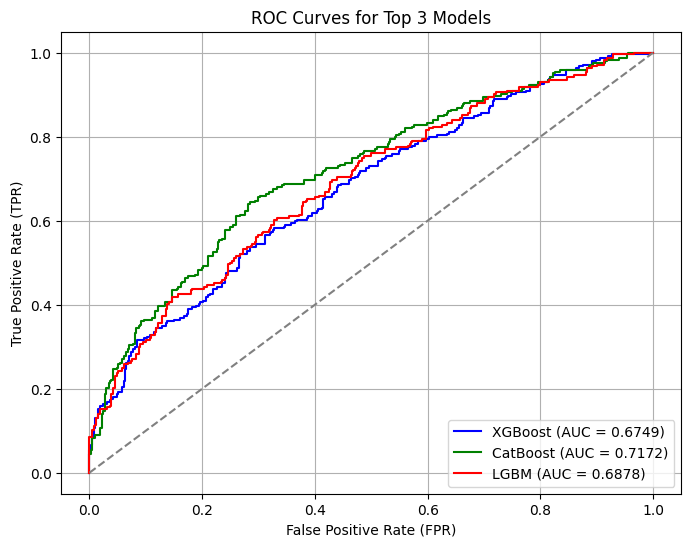

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

# Ensure the data is loaded
df = pd.read_csv('/content/water_potability.csv')

# Separate features (X) and target (y)
X = df.drop('Potability', axis=1)
y = df['Potability']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the models
xgb = XGBClassifier(random_state=42)
cat = CatBoostClassifier(random_state=42, verbose=0)
lgbm = LGBMClassifier(random_state=42)

# Fit the models to training data
xgb.fit(X_train, y_train)
cat.fit(X_train, y_train)
lgbm.fit(X_train, y_train)

# Calculate ROC curves
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb.predict_proba(X_test)[:, 1])
fpr_cat, tpr_cat, _ = roc_curve(y_test, cat.predict_proba(X_test)[:, 1])
fpr_lgbm, tpr_lgbm, _ = roc_curve(y_test, lgbm.predict_proba(X_test)[:, 1])

# Calculate AUC scores
roc_auc_xgb = roc_auc_score(y_test, xgb.predict_proba(X_test)[:, 1])
roc_auc_cat = roc_auc_score(y_test, cat.predict_proba(X_test)[:, 1])
roc_auc_lgbm = roc_auc_score(y_test, lgbm.predict_proba(X_test)[:, 1])

# Plot the ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_xgb:.4f})', color='blue')
plt.plot(fpr_cat, tpr_cat, label=f'CatBoost (AUC = {roc_auc_cat:.4f})', color='green')
plt.plot(fpr_lgbm, tpr_lgbm, label=f'LGBM (AUC = {roc_auc_lgbm:.4f})', color='red')
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Diagonal line for random guessing

# Add plot labels and title
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curves for Top 3 Models")
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [ ]:
#top-performing MODELS based on accuracy and ROC-AUC scores.

In [ ]:
from sklearn.metrics import accuracy_score

# Initialize the models
models = {
    'XGBoost': xgb,
    'CatBoost': cat,
    'LGBM': lgbm
}

# Dictionary to store model accuracy scores
results = {}

# Evaluate each model and store its accuracy
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[model_name] = acc

# Sort the results by accuracy
sorted_results = dict(sorted(results.items(), key=lambda item: item[1], reverse=True))

# Print the performance summary sorted by accuracy
print("\nFinal Model Performance Summary:")
print("Sorted by Accuracy:")
for model, acc in sorted_results.items():
    print(f"{model}: {acc:.4f}")



Final Model Performance Summary:
Sorted by Accuracy:
CatBoost: 0.7027
LGBM: 0.6784
XGBoost: 0.6448


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# After training, save the model
cat.save_model('catboost_model.cbm')

# Predict on test data
y_pred_catboost = cat.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred_catboost)}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_catboost))
print("Classification Report:")
print(classification_report(y_test, y_pred_catboost))


Accuracy: 0.7027439024390244
Confusion Matrix:
[[372  40]
 [155  89]]
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.90      0.79       412
           1       0.69      0.36      0.48       244

    accuracy                           0.70       656
   macro avg       0.70      0.63      0.63       656
weighted avg       0.70      0.70      0.68       656



In [ ]:
#ADDITIONAL MODELS AND TECHNIQUES TO INCREASE ACCURACY OF WATER

In [ ]:
#1]ensemble techniques

In [ ]:
# a.STACKING

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

estimators = [
    ('xgb', XGBClassifier()),
    ('cat', CatBoostClassifier(verbose=0)),
    ('lgbm', LGBMClassifier())
]
stack_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stack_model.fit(X_train, y_train)


[LightGBM] [Info] Number of positive: 1034, number of negative: 1586
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000424 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 2620, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.394656 -> initscore=-0.427780
[LightGBM] [Info] Start training from score -0.427780
[LightGBM] [Info] Number of positive: 828, number of negative: 1268
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000336 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 2096, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.395038 -> initscore=-0.426183
[LightGBM] [Info] Start training from score -0.426183
[LightGBM] [Info] Num

StackingClassifier(estimators=[('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=None,
                                              grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_...
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, ...)),
                               ('cat',
                                <catboost.core.CatBoostClassifier object at 0x7dd594201030>),
                               ('lgbm', LGBMClassifier())],
                   final_estimator=LogisticRegression())

In [ ]:
#b)Voting Classifier

In [ ]:
from sklearn.ensemble import VotingClassifier

voting_model = VotingClassifier(estimators=estimators, voting='soft')
voting_model.fit(X_train, y_train)


[LightGBM] [Info] Number of positive: 1034, number of negative: 1586
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000316 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 2620, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.394656 -> initscore=-0.427780
[LightGBM] [Info] Start training from score -0.427780


VotingClassifier(estimators=[('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_ra...
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                             ('cat',
                              <catboost.core.CatBoostClassifier object at 0x7dd594201030>),
                             ('lgbm', LGBMClassifier())],
                 voting='soft')

In [ ]:
#2]Neural Networks
#a.Multi-Layer Perceptron (MLP):

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.neural_network import MLPClassifier

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)

# Train the MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(128, 64, 32), max_iter=500, random_state=42)
mlp.fit(X_train, y_train)


MLPClassifier(hidden_layer_sizes=(128, 64, 32), max_iter=500, random_state=42)

In [ ]:
#b.Long Short-Term Memory (LSTM):

In [ ]:
#3]Advanced Boosting Algorithms
#a.AdaBoost (Adaptive Boosting)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=200, learning_rate=0.5)
ada.fit(X_train, y_train)


AdaBoostClassifier(learning_rate=0.5, n_estimators=200)

In [ ]:
#b.Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=300, learning_rate=0.1, max_depth=3)
gbc.fit(X_train, y_train)


GradientBoostingClassifier(n_estimators=300)

In [ ]:
#AutoML Frameworks

In [ ]:
#a.Auto-Sklearn

In [ ]:
!apt-get update
!apt-get install -y swig cmake python3-dev build-essential


Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:4 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:6 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Get:9 http://archive.ubuntu.com/ubuntu jammy-updates/restricted amd64 Packages [3,588 kB]
Get:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease [24.3 kB]
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,517 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [2,817 kB]
Hit:13 https://ppa.launc

In [ ]:
!pip install auto-sklearn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 59.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 65.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (pyproject.toml) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
#PyCaret AutoML library

In [ ]:
# Install PyCaret
!pip install pycaret pandas numpy scikit-learn

# Import required libraries
import pandas as pd
from pycaret.classification import *

# Load the water potability dataset
from google.colab import files

print("Please upload the 'water_potability.csv' file:")
uploaded = files.upload()

# Read the dataset
df = pd.read_csv('water_potability.csv')

# Display the first few rows to understand the data
print("\nFirst 5 rows of the dataset:")
print(df.head())

# Display basic information about the dataset
print("\nDataset Information:")
print(df.info())

# Handle missing values by replacing them with the column mean
df.fillna(df.mean(), inplace=True)

# Initialize PyCaret setup
clf = setup(data=df, target='Potability', session_id=42, train_size=0.8)

# Compare multiple models and select the best one automatically
best_model = compare_models()

# Display the best model
print("\nBest Model Selected:")
print(best_model)

# Evaluate the best model
evaluate_model(best_model)

# Finalize the model (train on the entire dataset)
final_model = finalize_model(best_model)

# Predict on the test set
predictions = predict_model(final_model)

# Export the best model pipeline
save_model(final_model, 'best_water_potability_model')

print("\nThe best model pipeline has been saved as 'best_water_potability_model'.")


Please upload the 'water_potability.csv' file:


Saving water_potability.csv to water_potability (2).csv

First 5 rows of the dataset:
         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3

,Description,Value
0,Session id,42
1,Target,Potability
2,Target type,Binary
3,Original data shape,"(3276, 10)"
4,Transformed data shape,"(3276, 10)"
5,Transformed train set shape,"(2620, 10)"
6,Transformed test set shape,"(656, 10)"
7,Numeric features,9
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.6748,0.6884,0.3581,0.6561,0.4621,0.2565,0.2816,1.4030
et,Extra Trees Classifier,0.6744,0.6957,0.3170,0.6888,0.4311,0.2435,0.2816,0.5190
qda,Quadratic Discriminant Analysis,0.6687,0.6848,0.3347,0.6502,0.4395,0.2377,0.2652,0.0460
catboost,CatBoost Classifier,0.6668,0.7008,0.3455,0.6362,0.4467,0.2373,0.2605,5.4950
lightgbm,Light Gradient Boosting Machine,0.6592,0.6712,0.4081,0.5924,0.4827,0.2413,0.2510,1.2680
xgboost,Extreme Gradient Boosting,0.6523,0.6668,0.4316,0.5739,0.4921,0.2356,0.2416,0.3810
gbc,Gradient Boosting Classifier,0.6389,0.6373,0.2437,0.5930,0.3444,0.1514,0.1805,1.7550
nb,Naive Bayes,0.6237,0.5853,0.2289,0.5469,0.3214,0.1173,0.1397,0.0360
lr,Logistic Regression,0.6099,0.4678,0.0000,0.0000,0.0000,0.0000,0.0000,1.0330
ridge,Ridge Classifier,0.6099,0.4654,0.0000,0.0000,0.0000,0.0000,0.0000,0.0340


Processing:   0%|          | 0/69 [00:00<?, ?it/s]


Best Model Selected:
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=42, verbose=0,
                       warm_start=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Transformation Pipeline and Model Successfully Saved

The best model pipeline has been saved as 'best_water_potability_model'.


In [ ]:
#TRAIN AND EVALUATE EXTRA TREES CLASSIFIER

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


In [ ]:
import pandas as pd

# Load the dataset from the local Colab workspace
df = pd.read_csv('water_potability.csv')

# Display the first few rows
print(df.head())


         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  


In [ ]:
# Fill missing values with the mean of each column
df.fillna(df.mean(), inplace=True)


In [ ]:
# Features and target
X = df.drop('Potability', axis=1)
y = df['Potability']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Initialize and train the Extra Trees Classifier
et_model = ExtraTreesClassifier(n_estimators=200, random_state=42)
et_model.fit(X_train, y_train)


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=200, n_jobs=None,
                     oob_score=False, random_state=42, verbose=0,
                     warm_start=False)

In [ ]:
#EVALUATE MODEL

=== Extra Trees Classifier Report ===
              precision    recall  f1-score   support

           0       0.69      0.91      0.79       412
           1       0.68      0.32      0.44       244

    accuracy                           0.69       656
   macro avg       0.69      0.62      0.61       656
weighted avg       0.69      0.69      0.66       656



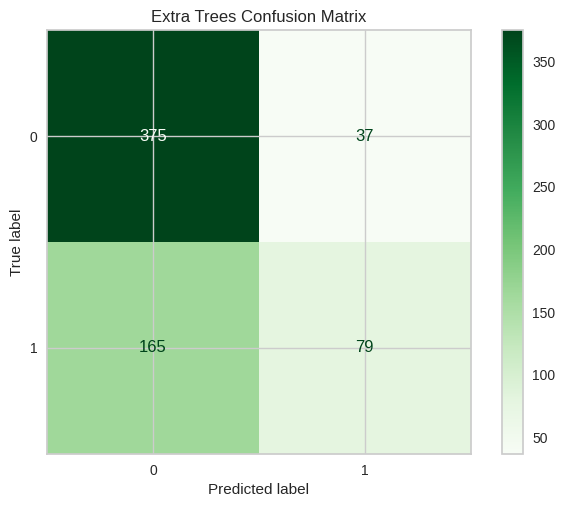

In [ ]:
# Make predictions on the test set
y_pred = et_model.predict(X_test)

# Print the classification report
print("=== Extra Trees Classifier Report ===")
print(classification_report(y_test, y_pred))

# Display the confusion matrix
ConfusionMatrixDisplay.from_estimator(et_model, X_test, y_test, cmap='Greens')
plt.title("Extra Trees Confusion Matrix")
plt.show()


In [ ]:
#Techniques to Improve Efficiency
#a.Dimensionality Reduction

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


In [ ]:
#b.FEATURE ENGINEERING

In [ ]:
import pandas as pd
import numpy as np

# Load dataset
url = '/content/water_potability.csv'
df = pd.read_csv(url)

df.head()


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
print(df.columns)


Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')


In [ ]:
#FEATURE ENGINEERING

In [ ]:
df['TDS_Hardness_Ratio'] = df['Solids'] / (df['Hardness'] + 1)  # Adding 1 to avoid division by zero
df['Sulfate_Turbidity_Ratio'] = df['Sulfate'] / (df['Turbidity'] + 1)


In [ ]:
#Add polynomial features for pH, Hardness, and Solids

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures


columns_to_transform = ['ph', 'Hardness', 'Solids']

# Handle missing values by filling with the mean of each column
df[columns_to_transform] = df[columns_to_transform].fillna(df[columns_to_transform].mean())

# Initialize PolynomialFeatures with degree 2
poly = PolynomialFeatures(degree=2, include_bias=False)

# Fit and transform the selected columns
poly_features = poly.fit_transform(df[columns_to_transform])

# Create a DataFrame with the new polynomial features
poly_columns = poly.get_feature_names_out(columns_to_transform)
poly_df = pd.DataFrame(poly_features, columns=poly_columns)

# Reset the index of both DataFrames to ensure alignment before concatenation
df = df.reset_index(drop=True)
poly_df = poly_df.reset_index(drop=True)

# Concatenate the new polynomial features with the original dataset
df = pd.concat([df, poly_df], axis=1)

# Display the updated DataFrame
print(df.head())


         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0  7.080795  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  ...  \
0       10.379783        86.990970   2.963135           0  ...   
1       15.180013        56.329076   4.500656           0  ...   
2       16.868637        66.420093   3.055934           0  ...   
3       18.436524       100.341674   4.628771           0  ...   
4       11.558279        31.997993   4.075075           0  ...   

   Sulfate_Turbidity_Ratio        ph    Hardness        Solids       ph^2  \
0                92.986084  7.080795  204.890

In [ ]:
#LOG TRANSFORMATION

In [ ]:
print(type(df['Solids']))
print(type(df['Sulfate']))


In [ ]:
import pandas as pd
import numpy as np

# Sample data
data = {'ph': [10, 20, 30, 40, 50],
        'Solids_1': [100, 200, 300, 400, 500]}
df = pd.DataFrame(data)

# Apply log transformation to each column separately
df['ph'] = np.log(df['ph'])
df['Solids_1'] = np.log(df['Solids_1'])

print(df)

         ph  Solids_1
0  2.302585  4.605170
1  2.995732  5.298317
2  3.401197  5.703782
3  3.688879  5.991465
4  3.912023  6.214608


In [ ]:
#Binning pH into categories: Acidic, Neutral, Alkaline

In [ ]:
print(df.columns)


Index(['ph', 'Solids_1'], dtype='object')


In [ ]:
print(df.head())


In [ ]:
df.columns = df.columns.str.lower()  # Convert all column names to lowercase
print(df.columns)  # Verify again


Index(['ph', 'solids_1'], dtype='object')


In [ ]:
print(df.columns.tolist())  # Print all column names explicitly as a list


In [ ]:
# Create the 'ph_Binned' column by binning the 'ph' values into categories
df['ph_Binned'] = pd.cut(
    df['ph'],
    bins=[0, 6.5, 7.5, 14],                # Define bins: Acidic (<6.5), Neutral (6.5-7.5), Alkaline (>7.5)
    labels=['Acidic', 'Neutral', 'Alkaline']  # Labels for each bin
)

# Display the first few rows to verify the 'ph_Binned' column
print(df[['ph', 'ph_Binned']].head())


         ph ph_Binned
0  2.302585    Acidic
1  2.995732    Acidic
2  3.401197    Acidic
3  3.688879    Acidic
4  3.912023    Acidic


In [ ]:
# Interaction Features

In [ ]:
import pandas as pd

# Load the dataset from a file (update path if necessary)
df = pd.read_csv('water_potability.csv')

# Check for duplicate columns
print("Duplicate columns:", df.columns[df.columns.duplicated()])

# Deduplicate column names by adding suffixes to duplicates
df.columns = pd.Series(df.columns).apply(
    lambda x: f"{x}_{pd.Series(df.columns).value_counts()[x]-1}"
    if pd.Series(df.columns).value_counts()[x] > 1 else x
)

# Verify column names after deduplication
print("Updated columns:", df.columns)

# Handle missing values by filling with the mean
df['Hardness'] = df['Hardness'].fillna(df['Hardness'].mean())
df['Turbidity'] = df['Turbidity'].fillna(df['Turbidity'].mean())

# Create the interaction term
df['Hardness_Turbidity_Interaction'] = df['Hardness'] * df['Turbidity']

# Display the result
print(df[['Hardness', 'Turbidity', 'Hardness_Turbidity_Interaction']].head())


Duplicate columns: Index([], dtype='object')
Updated columns: Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')
     Hardness  Turbidity  Hardness_Turbidity_Interaction
0  204.890455   2.963135                      607.118158
1  129.422921   4.500656                      582.488079
2  224.236259   3.055934                      685.251153
3  214.373394   4.628771                      992.285250
4  181.101509   4.075075                      738.002310


In [ ]:
#Encode the pH_Binned feature

In [ ]:
import pandas as pd
import numpy as np

# Load the dataset (modify the path if necessary)
df = pd.read_csv('water_potability.csv')

# Check for missing values in the 'ph' column and handle them by filling with the mean
df['ph'] = df['ph'].fillna(df['ph'].mean())

# Create the 'ph_Binned' column by binning the 'ph' values
df['ph_Binned'] = pd.cut(
    df['ph'],
    bins=[0, 6.5, 7.5, 14],                # Define the bins
    labels=['Acidic', 'Neutral', 'Alkaline']  # Labels for each bin
)

# Display the first few rows to verify 'ph_Binned'
print(df[['ph', 'ph_Binned']].head())


         ph ph_Binned
0  7.080795   Neutral
1  3.716080    Acidic
2  8.099124  Alkaline
3  8.316766  Alkaline
4  9.092223  Alkaline


In [ ]:
# Add 'Unknown' to the categories
df['ph_Binned'] = df['ph_Binned'].cat.add_categories('Unknown')

# Now, fill missing values with 'Unknown'
df['ph_Binned'] = df['ph_Binned'].fillna('Unknown')


In [ ]:
# Convert to object type temporarily
df['ph_Binned'] = df['ph_Binned'].astype('object')

# Now, fill missing values with 'Unknown'
df['ph_Binned'] = df['ph_Binned'].fillna('Unknown')


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('water_potability.csv')

# Handle missing values in 'ph' by filling with the mean
df['ph'] = df['ph'].fillna(df['ph'].mean())

# Create the 'ph_Binned' column by binning the 'ph' values
df['ph_Binned'] = pd.cut(
    df['ph'],
    bins=[0, 6.5, 7.5, 14],
    labels=['Acidic', 'Neutral', 'Alkaline']
)

# Add 'Unknown' as a new category to 'ph_Binned'
df['ph_Binned'] = df['ph_Binned'].cat.add_categories('Unknown')

# Handle missing values in 'ph_Binned' by filling with 'Unknown'
df['ph_Binned'] = df['ph_Binned'].fillna('Unknown')

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode the 'ph_Binned' column
df['ph_Binned_Encoded'] = label_encoder.fit_transform(df['ph_Binned'])

# Display the first few rows to verify
print(df[['ph', 'ph_Binned', 'ph_Binned_Encoded']].head())


         ph ph_Binned  ph_Binned_Encoded
0  7.080795   Neutral                  2
1  3.716080    Acidic                  0
2  8.099124  Alkaline                  1
3  8.316766  Alkaline                  1
4  9.092223  Alkaline                  1


In [ ]:
#FEATURE SCALING

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['Hardness', 'Solids', 'Sulfate', 'Conductivity']])

# Convert back to DataFrame
scaled_df = pd.DataFrame(scaled_features, columns=['Hardness_Scaled', 'Solids_Scaled', 'Sulfate_Scaled', 'Conductivity_Scaled'])
df = pd.concat([df, scaled_df], axis=1)


In [ ]:
#FINAL FEATURE SELECTION

In [ ]:
print(df.columns)

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability',
       'ph_Binned', 'ph_Binned_Encoded', 'Hardness_Scaled', 'Solids_Scaled',
       'Sulfate_Scaled', 'Conductivity_Scaled'],
      dtype='object')


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('water_potability.csv')

# Handle missing values in 'ph' by filling with the mean
df['ph'] = df['ph'].fillna(df['ph'].mean())

# Create the 'ph_Binned' column by binning the 'ph' values
df['ph_Binned'] = pd.cut(
    df['ph'],
    bins=[0, 6.5, 7.5, 14],
    labels=['Acidic', 'Neutral', 'Alkaline']
)

# Add 'Unknown' as a new category to 'ph_Binned'
df['ph_Binned'] = df['ph_Binned'].cat.add_categories('Unknown')

# Handle missing values in 'ph_Binned' by filling with 'Unknown'
df['ph_Binned'] = df['ph_Binned'].fillna('Unknown')

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode the 'ph_Binned' column
df['ph_Binned_Encoded'] = label_encoder.fit_transform(df['ph_Binned'])

# Create additional required columns (example)
# You need to define how these columns are created. Here are some examples:
df['Solids_Hardness_Ratio'] = df['Solids'] / df['Hardness']
df['Sulfate_Turbidity_Ratio'] = df['Sulfate'] / df['Turbidity']
df['Log_Solids'] = np.log1p(df['Solids'])
df['Log_Sulfate'] = np.log1p(df['Sulfate'])
df['Hardness_Turbidity_Interaction'] = df['Hardness'] * df['Turbidity']

# List of final features you want to select
final_features = [
    'Solids_Hardness_Ratio', 'Sulfate_Turbidity_Ratio', 'Log_Solids', 'Log_Sulfate',
    'Hardness_Turbidity_Interaction', 'ph_Binned_Encoded'
]

# Check if all columns in final_features exist in the DataFrame
missing_columns = [col for col in final_features if col not in df.columns]
if missing_columns:
    print(f"Missing columns: {missing_columns}")
else:
    # Select the features and target variable
    X = df[final_features]
    y = df['Potability']

    # Display the selected features
    print(X.head())


   Solids_Hardness_Ratio  Sulfate_Turbidity_Ratio  Log_Solids  Log_Sulfate  \
0             101.475293               124.367062    9.942339     5.912195   
1             143.947129                      NaN    9.832585          NaN   
2              88.788235                      NaN    9.899005          NaN   
3             102.710588                77.101713    9.999680     5.880215   
4              99.275740                76.105521    9.797015     5.740229   

   Hardness_Turbidity_Interaction  ph_Binned_Encoded  
0                      607.118158                  2  
1                      582.488079                  0  
2                      685.251153                  1  
3                      992.285250                  1  
4                      738.002310                  1  


In [ ]:
# //MODEL DEPLOYMENT//

In [ ]:
#Streamlit library helps you quickly create interactive web apps for ML models.


In [3]:
!pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 50.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 55.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.3 MB/s eta 0:00:00


In [42]:
!pip install catboost


In [43]:
import subprocess
import sys

subprocess.check_call([sys.executable, "-m", "pip", "install", "catboost"])

0

In [12]:
#Train and Save Your Model

In [61]:
# Step 1: Install required libraries
!pip install streamlit

# Step 2: Create the Streamlit app file using regular Python code
with open("app.py", "w") as file:
    file.write("""
import streamlit as st
import pickle
import numpy as np

# Load the pre-trained model (ensure the model is uploaded to the session)
model = pickle.load(open('model.pkl', 'rb'))

# Title of the web app
st.title("Water Potability Prediction")

# Add input fields for all parameters in the Water Potability Dataset
ph = st.number_input("Enter pH Level", min_value=0.0, max_value=14.0)
hardness = st.number_input("Enter Hardness")
solids = st.number_input("Enter Solids")
chloramines = st.number_input("Enter Chloramines")
sulfate = st.number_input("Enter Sulfate")
conductivity = st.number_input("Enter Conductivity")
organic_carbon = st.number_input("Enter Organic Carbon")
chlorine = st.number_input("Enter Chlorine")
turbidity = st.number_input("Enter Turbidity")

# Prediction logic
if st.button('Predict'):
    # Collect input features into an array
    features = np.array([[ph, hardness, solids, chloramines, sulfate, conductivity, organic_carbon, chlorine, turbidity]])

    # Make a prediction using the model
    prediction = model.predict(features)

    # Display the result
    if prediction == 1:
        st.success("The water is potable!")
    else:
        st.error("The water is not potable.")
""")

# Step 3: Upload the model file
from google.colab import files
uploaded = files.upload()



Saving water_potability.csv to water_potability (1).csv


In [68]:
%pip install -U scikit-learn==1.2.2


In [70]:
import subprocess
import sys

# Install scikit-learn version 1.2.2
subprocess.check_call([sys.executable, "-m", "pip", "install", "-U", "scikit-learn==1.2.2"])


0

In [72]:
# Create a requirements.txt file in the current working directory
with open('requirements.txt', 'w') as file:
    file.write("""
streamlit==1.41.1
numpy==1.26.4
pandas==2.2.2
scikit-learn==1.2.2
    """)


In [73]:
# Install the dependencies from the requirements.txt file
!pip install -r requirements.txt


In [74]:
%%writefile app.py

import streamlit as st
import pickle
import numpy as np

# Load the pre-trained model (ensure model.pkl is available in Colab's runtime)
model = pickle.load(open('model.pkl', 'rb'))

st.title("Water Potability Prediction")

# Input fields
ph = st.number_input("Enter pH Level", min_value=0.0, max_value=14.0)
hardness = st.number_input("Enter Hardness")
solids = st.number_input("Enter Solids")
chloramines = st.number_input("Enter Chloramines")
sulfate = st.number_input("Enter Sulfate")
conductivity = st.number_input("Enter Conductivity")
organic_carbon = st.number_input("Enter Organic Carbon")
chlorine = st.number_input("Enter Chlorine")
turbidity = st.number_input("Enter Turbidity")

if st.button('Predict'):
    features = np.array([[ph, hardness, solids, chloramines, sulfate, conductivity, organic_carbon, chlorine, turbidity]])
    prediction = model.predict(features)

    if prediction == 1:
        st.success("The water is potable!")
    else:
        st.error("The water is not potable.")


Overwriting app.py
